In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class gridEnv(object):
    def __init__(self, rows, columns, obs, end):
        self.rows = rows
        self.columns = columns
        self.obs = obs
        self.end = end
        self.fig, self.axs = plt.subplots(self.rows, self.columns, figsize=(5, 5), layout='constrained')

    def draw(self):
        # rows: i
        # columns: j
        for i, ax in enumerate(self.axs):
            for j in range(self.columns):
                # config axis
                ax[j].set_xlim(0, 10)
                ax[j].set_ylim(0, 10)
                ax[j].xaxis.set_visible(False)
                ax[j].yaxis.set_visible(False)

                # add state name
                ax[j].text(1, 1, "S" + str(self.columns * i + j + 1))

        # config background of obstacle and destination
        # obstacle: #ffc000
        # destination: #66ffff
        for i in self.obs:
            self.axs[self.getxy(i)].set_facecolor("#ffc000")
        self.axs[self.getxy(self.end)].set_facecolor("#66ffff")

        # display(self.fig)
            
    def getxy(self, id):
        return ((id - 1) // self.columns, (id - 1) % self.columns)

    def iter(self):
        self.axs[0, 0].arrow(5, 5, 3, 0, color="red")
        self.draw()
        
    def value(self, v):
        for i, ax in enumerate(self.axs):
            for j in range(self.columns):   
                ax[j].text(1, 5,  str(round(v[self.columns * i + j], 1)))

        # display(self.fig)


The closed-form solution is:
$$v_\pi=(I-\gamma P_\pi)^{-1}r_\pi$$

Use it to calculate state value.

[ 3.5  3.9  4.3  4.8  5.3  3.1  3.5  4.8  5.3  5.9  2.8  2.5 10.   5.9
  6.6  2.5 10.  10.  10.   7.3  2.3  9.  10.   9.   8.1]


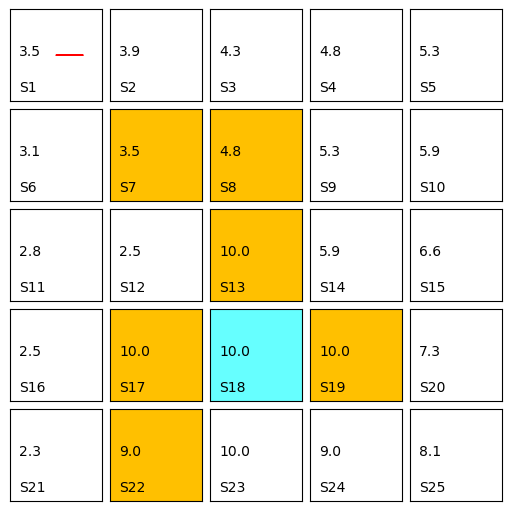

In [3]:
para = {"rows" : 5,
        "columns" : 5,
        "obs" : (7, 8, 13, 17, 19, 22),
        "end" : 18,
        "gamma" : 0.9}

total_state = para["rows"] * para["columns"]

# reward matrix
r = np.array([0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              0, 0, 1, 0, 0,
              0, 1, 1, 1, 0,
              0, 0, 1, 0, 0])

# transition matrix
p = np.zeros((total_state, total_state))
p[0, 1] = 1
p[1, 2] = 1
p[2, 3] = 1
p[3, 8] = 1
p[4, 9] = 1

p[5, 0] = 1
p[6, 1] = 1
p[7, 8] = 1
p[8, 13] = 1
p[9, 14] = 1

p[10, 5] = 1
p[11, 10] = 1
p[12, 17] = 1
p[13, 14] = 1
p[14, 19] = 1

p[15, 10] = 1
p[16, 17] = 1
p[17, 17] = 1
p[18, 17] = 1
p[19, 24] = 1

p[20, 15] = 1
p[21, 22] = 1
p[22, 17] = 1
p[23, 22] = 1
p[24, 23] = 1

v = np.linalg.inv(np.eye(total_state) - para["gamma"] * p).dot(r)
v = np.round(v, 1)
print(v)

g = gridEnv(para["rows"], para["columns"], para["obs"], para["end"])
g.iter()
g.value(v)


An iterative solution is: 
$$v_{k+1}=r_\pi+\gamma P_\pi v_k$$  

Use it to calculate state value.


In [4]:
def bellman_iterative_solution(r_pi, gamma, transition_matrix, v_init, deta):
    v_old = v_init
    i = 0

    while True:
        i = i + 1
        v_new = r_pi + gamma * np.dot(transition_matrix, v_old)

        if abs(np.all(np.absolute(v_new - v_old) < deta)):
            print(i)
            return v_new
            break
        
        # print(np.max(abs(v_new - v_old)))
        # print(v_new - v_old)
        v_old = v_new


67


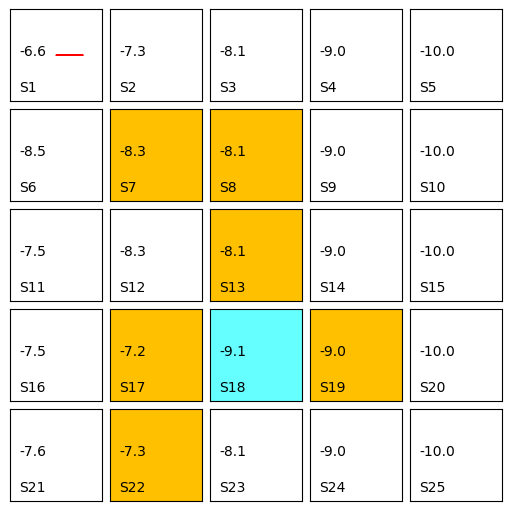

In [5]:
para = {"rows" : 5,
        "columns" : 5,
        "obs" : (7, 8, 13, 17, 19, 22),
        "end" : 18,
        "gamma" : 0.9,
        "deta" : 0.001}

total_state = para["rows"] * para["columns"]

# reward matrix
r = np.array([0, 0, 0, 0,-1,
             -1,-1, 0, 0,-1,
              0,-1, 0, 0,-1,
             -1, 1,-1, 0,-1,
             -1, 0, 0, 0,-1])

# transition matrix
p = np.zeros((total_state, total_state))
p[0, 1] = 1
p[1, 2] = 1
p[2, 3] = 1
p[3, 4] = 1
p[4, 4] = 1

p[5, 6] = 1
p[6, 7] = 1
p[7, 8] = 1
p[8, 9] = 1
p[9, 9] = 1

p[10, 11] = 1
p[11, 12] = 1
p[12, 13] = 1
p[13, 14] = 1
p[14, 14] = 1

p[15, 16] = 1
p[16, 17] = 1
p[17, 18] = 1
p[18, 19] = 1
p[19, 19] = 1

p[20, 21] = 1
p[21, 22] = 1
p[22, 23] = 1
p[23, 24] = 1
p[24, 24] = 1

v_init = np.zeros(25)

g = gridEnv(para["rows"], para["columns"], para["obs"], para["end"])
g.iter()

v = bellman_iterative_solution(r, para["gamma"], p, v_init, para["deta"])

g.value(v)

Get optimal policy by solving the BOE:
$$\pi ^*(s,a) = $$

[2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 4. 3. 3. 0. 1. 0. 3.
 3.]


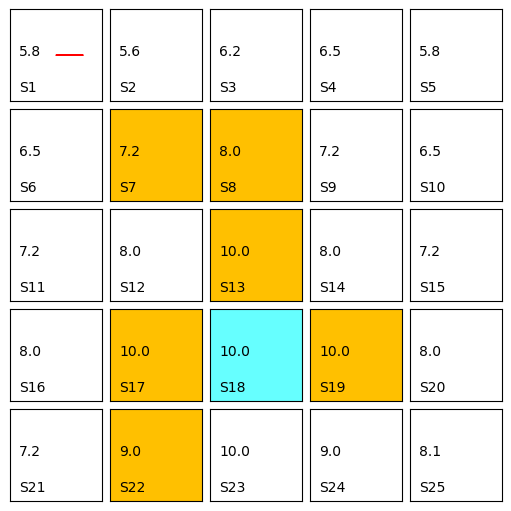

In [11]:
def BOE(**para):
    total_state = para["rows"] * para["columns"]
    v_old = np.zeros(total_state)

    while True:
        # policy update
        v_new = np.zeros(total_state)    # 本轮迭代完成之后，各状态最大的q(s, a)，[q(s1, a), q(s2, a), ...]
        a = np.zeros(total_state)        # 本轮迭代完成之后，各状态使q(s, a)最大的a，[a, a, ...]

        # 依次扫描各状态，每扫描一次，v_new 和 a 分别新增一个元素
        for i in range(para["rows"]):
            for j in range(para["columns"]):
                q = []  # 用于存放当前状态s下，对于各个动作a的q值，即动作价值函数q(s, a)，[q(s, a1), q(s, a2), q(s, a3),...]

                for _a in ((-1, 0), (0, 1), (1, 0), (0, -1), (0, 0)):    # 上、右、下、左、原地不动
                    ii = i + _a[0]  # (ii, jj)为执行动作 _a 之后新的坐标
                    jj = j + _a[1]

                    id_old = para["columns"] * i + j    # 执行动作 _a 之前的状态序号，即s1/s2...中的序号1/2...
                    id_new = para["columns"] * ii + jj  # 执行动作 _a 之后的状态序号，即s1/s2...中的序号1/2...，此值可能越界，使用之前需判断
                    
                    r = 0                               # r 为即时奖励
                    v = 0                               # 用于计算 q(s, a)

                    if ii < 0 or ii > (para["rows"] - 1) or \
                        jj < 0 or jj > (para["columns"] - 1):   # 越界弹回
                        r = para["reward_forbid"]
                        v = v_old[id_old]
                    elif (id_new + 1) in para["obs"]:         # forbidden aera
                        r = para["reward_forbid"]
                        v = v_old[id_new]
                    elif (id_new + 1) == para["end"]:         # 到达目标
                        r = para["reward_end"]
                        v = v_old[id_new]
                    else:                               # 其它
                        r = 0
                        v = v_old[id_new]

                    q_sa = r + para["gamma"] * v
                    q.append(q_sa)

                v_new[id_old] = max(q)
                a[id_old] = q.index(max(q))
        
        # value update
        if max(abs(v_new - v_old)) < para["deta"]:
            return (v_new, a)
            break

        if np.all(np.absolute(v_new - v_old) < para["deta"]):
            return (v_new, a)
            break

        v_old = v_new


para = {"rows" : 5,
    "columns" : 5,
    "obs" : (7, 8, 13, 17, 19, 22),
    "end" : 18,
    "gamma" : 0.9,
    "deta" : 0.001,
    "reward_forbid" : -1, 
    "reward_end" : 1}


g = gridEnv(para["rows"], para["columns"], para["obs"], para["end"])
g.iter()

v, a = BOE(**para)
g.value(v)

print(a)